In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from preprocess_data import filter_col, get_table
import pandas as pd
import glob
import os

In [2]:
def extract_participants(files):
    return [os.path.basename(file).split('.')[0] for file in files]

valid_file = glob.glob(os.path.join('CSV_DATA', '*.csv'))
valid_index = extract_participants(valid_file)
len(valid_index)

180

In [101]:
def create_data(index, drowsy_ratio, look_back=50):
    df = get_table(index)
    df = filter_col(df)
    df.drop(df.columns[0], axis=1, inplace=True)
    print(f'{index}: {df.isnull().sum().sum()}')
    
    X = np.array(df)
    n = X.shape[0]
    X = X[:n - n%look_back]
    mood = index.split('_')[1]
    y = np.full((len(X), 1), mood, dtype=int).squeeze()
    y = y[::look_back]
    if drowsy_ratio == 'half':
        y[y!=10] = 0
        y[y==10] = 1
    else:
        y[y!=0] = 1
        
    return X, y

In [51]:
def create_data(index, drowsy_ratio, look_back=50, 
         train_percentage=.75):
    df = get_table(index)
    df = filter_col(df)
    df.drop(df.columns[0], axis=1, inplace=True)
    print(f'{index}: {df.isnull().sum().sum()}')
    
    X = np.array(df)
    
    # remove some element to reshape
    n = X.shape[0]
    X = X[:n - n%look_back]
    X = np.reshape(X, (n//look_back, look_back, X.shape[1]))
    
    train_index = int(X.shape[0]*train_percentage)
    X_train = X[:train_index]
    X_test = X[train_index:]

    mood = index.split('_')[1]
    y = np.full((X.shape[0], 1), mood, dtype=int).squeeze()
    
    if drowsy_ratio == 'half':
        y[y!=10] = 0
        y[y==10] = 1
    else:
        y[y!=0] = 1
    
    y_train = y[:train_index]
    y_test = y[train_index:]
    
    return X_train, y_train, X_test, y_test

In [98]:
look_back = 50
drowsy_ratio = 'half'

In [99]:
def extract_full(look_back, drowsy_ratio, val=valid_index):
    X = []
    y = []
    for index in val:
        X_, y_ = create_data(index, drowsy_ratio, look_back)
        
        X += [X_]
        y += [y_]
        

    X = np.concatenate(X, axis = 0)
    y = np.concatenate(y, axis = 0)
    
    print(f'Train data: {X.shape}')
    print(f'Test data: {y.shape}')
    
    return X, y

X, y = extract_full(look_back, drowsy_ratio)

10_0: 0
10_10: 0
10_5: 0
11_0: 0
11_10: 0
11_5: 0
12_0: 0
12_10: 0
12_5: 0
13_0: 0
13_10: 0
13_5: 0
14_0: 0
14_10: 0
14_5: 0
15_0: 0
15_10: 0
15_5: 0
16_0: 0
16_10: 0
16_5: 0
17_0: 0
17_10: 0
17_5: 0
18_0: 0
18_10: 0
18_5: 0
19_0: 0
19_10: 0
19_5: 0
1_0: 0
1_10: 0
1_5: 0
20_0: 0
20_10: 0
20_5: 0
21_0: 0
21_10: 0
21_5: 0
22_0: 0
22_10: 0
22_5: 0
23_0: 0
23_10: 0
23_5: 0
24_0: 0
24_10: 0
24_5: 0
25_0: 0
25_10: 0
25_5: 0
26_0: 0
26_10: 0
26_5: 0
27_0: 0
27_10: 0
27_5: 0
28_0: 0
28_10: 0
28_5: 0
29_0: 0
29_10: 0
29_5: 0
2_0: 0
2_10: 0
2_5: 0
30_0: 0
30_10: 0
30_5: 0
31_0: 0
31_10: 0
31_5: 0
32_0: 0
32_10: 0
32_5: 0
33_0: 0
33_10: 0
33_5: 0
34_0: 0
34_10: 0
34_5: 0
35_0: 0
35_10: 0
35_5: 0
36_0: 0
36_10: 0
36_5: 0
37_0: 0
37_10: 0
37_5: 0
38_0: 0
38_10: 0
38_5: 0
39_0: 0
39_10: 0
39_5: 0
3_0: 0
3_10: 0
3_5: 0
40_0: 0
40_10: 0
40_5: 0
41_0: 0
41_10: 0
41_5: 0
42_0: 0
42_10: 0
42_5: 0
43_0: 0
43_10: 0
43_5: 0
44_0: 0
44_10: 0
44_5: 0
45_0: 0
45_10: 0
45_5: 0
46_0: 0
46_10: 0
46_5: 0
47_0: 0
4

In [96]:
pd.DataFrame(X).to_csv(f'lstm_data{time//10}{drowsy_ratio}.csv', header=False, index=False)
pd.DataFrame(y).to_csv(f'lstm_abel{time//10}{drowsy_ratio}.csv', header=False, index=False)

In [116]:
X = pd.read_csv(f'lstm_data{time//10}{drowsy_ratio}.csv', header=None)
y = pd.read_csv(f'lstm_abel{time//10}{drowsy_ratio}.csv', header=None)

In [106]:
labels, counts = np.unique(y, return_counts=True)
for label, count in zip(labels, counts):
    print(f'{label}: {count}')

0: 663300
1: 337100


In [124]:
y = np.array(y.iloc[::50]).squeeze()
y.shape

(20008,)

In [128]:
X = np.array(X)
X.shape

(1000400, 8)

In [129]:
X = np.reshape(X, (-1, look_back, X.shape[1]))
X.shape

(20008, 50, 8)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=17/22,
                                                       shuffle=True, random_state=5)
print(X_train.shape, X_test.shape)

(15460, 50, 8) (4548, 50, 8)


In [133]:
model = Sequential()
model.add(LSTM(4, input_shape=(50, 8)))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4)                 208       
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, batch_size = 16)

Epoch 1/50
967/967 [==============================] - 10s 11ms/step - loss: 0.5155 - accuracy: 0.7559 - val_loss: 0.5150 - val_accuracy: 0.7610
Epoch 2/50
967/967 [==============================] - 10s 11ms/step - loss: 0.5181 - accuracy: 0.7554 - val_loss: 0.5218 - val_accuracy: 0.7601
Epoch 3/50
967/967 [==============================] - 10s 11ms/step - loss: 0.5305 - accuracy: 0.7506 - val_loss: 0.5223 - val_accuracy: 0.7526
Epoch 4/50
967/967 [==============================] - 10s 11ms/step - loss: 0.5264 - accuracy: 0.7489 - val_loss: 0.5111 - val_accuracy: 0.7599
Epoch 5/50
967/967 [==============================] - 11s 11ms/step - loss: 0.5224 - accuracy: 0.7484 - val_loss: 0.5099 - val_accuracy: 0.7568
Epoch 6/50
967/967 [==============================] - 11s 11ms/step - loss: 0.5161 - accuracy: 0.7506 - val_loss: 0.5078 - val_accuracy: 0.7643
Epoch 7/50
967/967 [==============================] - 10s 10ms/step - loss: 0.5145 - accuracy: 0.7545 - val_loss: 0.5051 - val_accuracy:

In [140]:
history

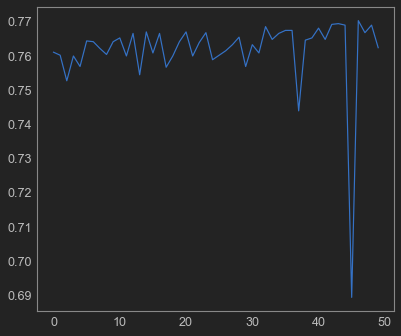

In [142]:
from jupyterthemes import jtplot
jtplot.style(grid=False)

plt.plot(history.history['val_accuracy'])

In [137]:
model.save("lstm_50.h5")

In [143]:
model.save("lstm_100.h5")